In [ ]:
import cvxopt
print(cvxopt.__version__)
from cvxopt import matrix, solvers

1.3.2


In [2]:
from cvxopt import matrix, solvers

# Định nghĩa dữ liệu
c = matrix([-1.0, -1.0])  # Hệ số mục tiêu
G = matrix([[1.0, 1.0], [-1.0, 0.0], [0.0, -1.0]])  # Ràng buộc bất đẳng thức
h = matrix([1.0, 0.0, 0.0])  # Giới hạn của ràng buộc

# Giải bài toán
sol = solvers.lp(c, G, h)

# In kết quả
print("Giá trị tối ưu:", sol['primal objective'])
print("Giải pháp tối ưu:", sol['x'])

TypeError: 'G' must be a dense or sparse 'd' matrix with 2 columns

In [ ]:


# Định nghĩa dữ liệu
c = matrix([-500.0, -700.0])  # Hệ số mục tiêu (đổi dấu vì cvxopt giải bài toán tối thiểu)
G = matrix([[2.0, 4.0], [3.0, 2.0]])  # Ma trận ràng buộc bất đẳng thức
h = matrix([100.0, 80.0])  # Giới hạn của ràng buộc
A = matrix([[1.0, 0.0], [0.0, 1.0]])  # Ràng buộc không âm
b = matrix([0.0, 0.0])  # Giá trị của ràng buộc không âm

# Giải bài toán
sol = solvers.lp(c, G.T, h, A.T, b)

# In kết quả
print("Giá trị tối ưu:", -sol['primal objective'])  # Đổi dấu để lấy giá trị tối đa
print("Giải pháp tối ưu:")
print("Số lượng sản phẩm A:", sol['x'][0])
print("Số lượng sản phẩm B:", sol['x'][1])

     pcost       dcost       gap    pres   dres   k/t
 0:  2.0952e-11 -1.8000e+02  2e+02  3e-14  9e-03  1e+00
 1:  2.0952e-13 -1.8000e+00  2e+00  3e-16  9e-05  1e-02
 2:  2.0952e-15 -1.8000e-02  2e-02  3e-16  9e-07  1e-04
 3:  2.0954e-17 -1.8000e-04  2e-04  2e-16  9e-09  1e-06
 4:  6.0922e-19 -1.8000e-06  2e-06  7e-17  9e-11  1e-08
 5: -1.0307e-12 -1.8000e-08  2e-08  2e-15  9e-13  1e-10
Optimal solution found.
Giá trị tối ưu: 1.0306578097344934e-12
Giải pháp tối ưu:
Số lượng sản phẩm A: 2.2582335811626348e-15
Số lượng sản phẩm B: -1.406556869240341e-16


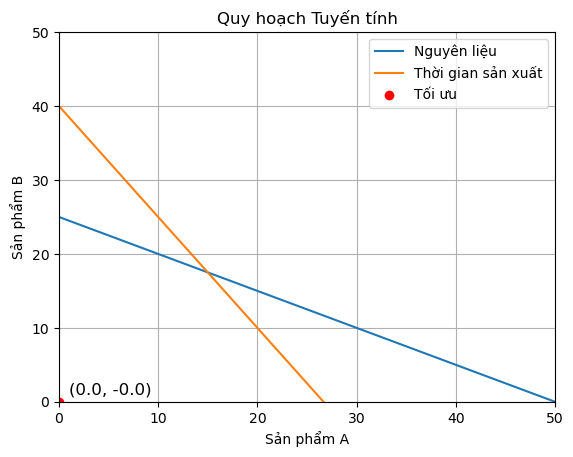

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Vẽ đường ràng buộc
x = np.linspace(0, 50, 100)
plt.plot(x, (100 - 2*x) / 4, label='Nguyên liệu')
plt.plot(x, (80 - 3*x) / 2, label='Thời gian sản xuất')

# Vẽ điểm tối ưu
plt.scatter(sol['x'][0], sol['x'][1], color='red', label='Tối ưu')
plt.text(sol['x'][0] + 1, sol['x'][1] + 1, f'({sol["x"][0]:.1f}, {sol["x"][1]:.1f})', fontsize=12)

# Thiết lập trục và nhãn
plt.xlim(0, 50)
plt.ylim(0, 50)
plt.xlabel('Sản phẩm A')
plt.ylabel('Sản phẩm B')
plt.legend()
plt.grid(True)
plt.title('Quy hoạch Tuyến tính')
plt.show()